# **Entrenamiento de Modelo (Machine Learning)**

## **Introducción**

Una compañía móvil requiere un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes más acorde con el usuario.

- **Plan de trabajo:**
    - Visualizar datos.
    - Segmentar los datos.
    - Ver el tipo de modelo necesario y colocarlos a prueba.
    - Comprobar calidad de los modelos.
    - Seleccionar el modelo con mayor exactitud.
    - Conclusiones

## **Visualizar datos**

In [1]:
#Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [38]:
#Cargar los datos
try:
    df = pd.read_csv('data/users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

In [39]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [40]:
#Veriricar ausentes
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [41]:
#Revisar si existen duplicados 
df.duplicated().sum()

0

- **Descripción de datos**

    - `сalls` — número de llamadas,
    - `minutes` — duración total de la llamada en minutos,
    - `messages` — número de mensajes de texto,
    - `mb_used` — Tráfico de Internet utilizado en MB,
    - `is_ultra` — plan para el mes actual (Ultra - 1, Smart - 0).

Con los datos para el análisis, se puede determinar que el modelo requerido es supervisado y de clasificación.

## **Modelos**

### **Segmentar datos**

In [42]:
#Separar datos en objetivos y características
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [43]:
#Clasificar datos para entrenamiento 60%, testeo 20% y validación 20% 
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=12345, test_size= 0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=12345, test_size= 0.25)

In [44]:
print(f'datos de entrenamiento {x_train.shape} y cantidad de objetivos { y_train.shape[0]}. Porcentaje {round((y_train.shape[0]/len(df))*100,2)}%')
print(f'datos de entrenamiento {x_test.shape} y cantidad de objetivos { y_test.shape[0]}. Porcentaje {round((y_test.shape[0]/len(df))*100,2)}%')
print(f'datos de entrenamiento {x_val.shape} y cantidad de objetivos { y_val.shape[0]}. Porcentaje {round((y_val.shape[0]/len(df))*100,2)}%')

datos de entrenamiento (1928, 4) y cantidad de objetivos 1928. Porcentaje 59.99%
datos de entrenamiento (643, 4) y cantidad de objetivos 643. Porcentaje 20.01%
datos de entrenamiento (643, 4) y cantidad de objetivos 643. Porcentaje 20.01%


### **Árbol de decisión**

In [45]:
#Probar con datos de entrenamiento y testeo, cuales son los hiperparametros que determinan el mejor modelo
best_score = 0
best_depth = 0

for depth in range(1, 15):
    model= DecisionTreeClassifier(random_state=12345, max_depth= depth)
    model.fit(x_train, y_train)
    score_test= model.score(x_test, y_test)
    if score_test > best_score:
        best_score = score_test
        best_depth = depth

In [46]:
print("Accuracy del mejor modelo en el conjunto de testeo {}".format(best_score))
print("max_depht {}".format(best_depth))

Accuracy del mejor modelo en el conjunto de testeo 0.7884914463452566
max_depht 5


In [47]:
#Crear modelo, árbol de decisiones con los mejores hiperparametros
model1 = DecisionTreeClassifier(random_state=12345, max_depth= best_depth)

In [48]:
#Entrenar modelo
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=12345)

In [49]:
#Realizar predicciones con los datos de testeo
predictions_test1 = model1.predict(x_test)
predictions_test1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [50]:
#Probar exactitud del modelo con los datos de testeo
accuracy1 = accuracy_score(y_test, predictions_test1)
accuracy1

0.7884914463452566

### **Bosque aleatorio**

In [51]:
#Probar con datos de entrenamiento y testeo, cuales son los hiperparametros que determinan el mejor modelo
best_score = 0
best_est = 0
best_depth = 0

for est in range(1, 100, 10):
    for depth in range(1, 10):
        model= RandomForestClassifier(random_state=12345, n_estimators= est, max_depth= depth)
        model.fit(x_train, y_train)
        score_test= model.score(x_test, y_test)
        if score_test > best_score:
            best_score = score_test
            best_est = est
            best_depth = depth

In [52]:
print("Accuracy del mejor modelo en el conjunto de testeo {}".format(best_score))
print("n_estimators {}".format(best_est))
print("max_depht {}".format(best_depth))

Accuracy del mejor modelo en el conjunto de testeo 0.8009331259720062
n_estimators 81
max_depht 9


In [53]:
#Crear modelo, bosque aleatorio con los mejores hiperparametros
model2 =RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)

In [54]:
#Entrenar modelo
model2.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=81, random_state=12345)

In [55]:
#Realizar predicciones con los datos de testeo
predictions_test2 = model2.predict(x_test)

In [56]:
#Probar exactitud del modelo con los datos de testeo
accuracy2= accuracy_score(y_test,predictions_test2)
accuracy2

0.8009331259720062

### **Regresión Logística**

In [57]:
#Probar con datos de entrenamiento y testeo
model= LogisticRegression(random_state=12345, solver='liblinear')
model.fit(x_train, y_train)
score_test= model.score(x_test, y_test)
score_test

0.7527216174183515

In [58]:
#Crear modelo, regresión logística con los mejores hiperparametros
model3= LogisticRegression(random_state=12345, solver='liblinear')

In [59]:
#Entrenar modelo
model3.fit(x_train, y_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [60]:
#Realizar predicciones con los datos de testeo
predictions_test3 = model3.predict(x_test)

In [61]:
#Probar exactitud del modelo con los datos de testeo
accuracy3 = accuracy_score(y_test, predictions_test3)
accuracy3

0.7527216174183515

### **clasificador de referencia** (prueba de cordura)

In [62]:
#Probar con datos de entrenamiento y testeo, cuales son los hiperparametros que determinan el mejor modelo
strategies = ['most_frequent', 'prior', 'stratified', 'uniform']
best_score = 0

for strategy in strategies:
    model = DummyClassifier(random_state = 12345, strategy = strategy)
    model.fit(x_train, y_train)
    score_test = model.score(x_test, y_test)
    if score_test > best_score:
        best_score = score_test
        best_strategy = strategy

In [63]:
print("Accuracy del mejor modelo en el conjunto de testeo {}".format(best_score))
print("Strategy: {}".format(best_strategy))

Accuracy del mejor modelo en el conjunto de testeo 0.6951788491446346
Strategy: most_frequent


In [64]:
#Crear modelo, Clasificador de referencia con los mejores hiperparametros
model4 = DummyClassifier(random_state = 12345, strategy = best_strategy)

In [65]:
#Entrenar modelo
model4.fit(x_train,y_train)

DummyClassifier(random_state=12345, strategy='most_frequent')

In [66]:
#Realizar predicciones con los datos de testeo
predictions_test4 = model4.predict(x_test)

In [67]:
#Probar exactitud del modelo con los datos de testeo
accuracy4 = accuracy_score(y_test, predictions_test4)
accuracy4

0.6951788491446346

## **Mejor modelo**

In [68]:
#Crear df con los datos obtenidos de accuracy
models = pd.DataFrame(
    {'model_type' : ['DecisionTree', 'RandomForest', 'LogisticRegresion', 'DummyClassifier'],
     'accuracy' : [accuracy1, accuracy2, accuracy3, accuracy4],
     }
)

In [69]:
#Visualizar el df
models

,model_type,accuracy
0,DecisionTree,0.788491
1,RandomForest,0.800933
2,LogisticRegresion,0.752722
3,DummyClassifier,0.695179


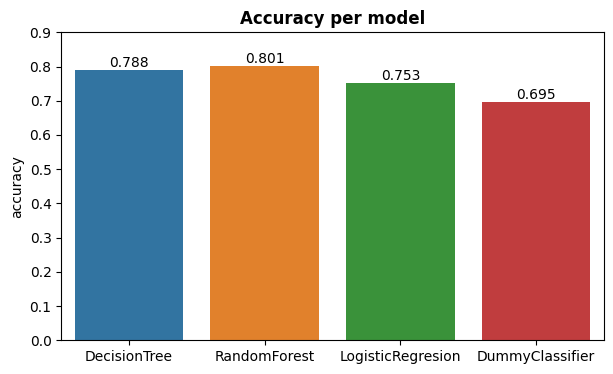

In [70]:
#Graficar la exactitud de los modelos
fig = plt.figure(figsize=(7, 4))
ax = sns.barplot(x='model_type',
            y='accuracy', 
            data=models,
            ax=fig.add_subplot(),
            )
plt.bar_label(ax.containers[0], fmt='%.3f')
plt.title('Accuracy per model', fontweight = 'bold')
plt.ylim(0, 0.9)
plt.xlabel('')
plt.show()

El modelo con mayor resultado en las pruebas de exactitud y utilizando los datos de testeo, fue el bosque aleatorio. Por otro lado, dicho modelo paso la prueba de cordura, arrojando una exactitud mayor que el modelo clasificador de referencia. Ahora, se debe probar el modelo (model2) con los datos de validación.

In [71]:
#Predicciones del mejor modelo
predictions_val = model2.predict(x_val)

In [72]:
#Exactitud del modelo
accuracy_val = accuracy_score(y_val, predictions_val)
accuracy_val

0.7884914463452566

## **Conclusiones**

1. **Visualizar datos:** Los datos no tienes ausentes, duplicados y la variable objetivo ya esta en valores numéricos.

2. **Segmentar los datos:** Los datos se lograron segmentar de la siguiente manera:
    - Entrenamiento con 1928 datos, siendo un 60%.
    - Testeo con 643 datos, siendo un 20%.
    - Validación con 643 datos, siendo un 20%.

3. **Ver el tipo de modelo necesario y probarlos:** El tipo de modelo necesario es de clasificación y se prueban tres modelos:
    - Árbol de decisión
    - Bosque aleatorio
    - Regresión logística
    - Clasificador de referencia

4. **Comprobar calidad de los modelos:** Se aplicaron métricas como exactitud y al mismo tiempo se probaron con hiperparametros diferentes, para así lograr los modelos con mejor precisión.
    - Tabla de resultados:

| Modelos | Exactitud |
|---|---|
| Árbol de decisiones | 0.788 |
| **Bosque aleatorio** | **0.800** |
| Regresión logística | 0.751 |
| Clasificador de referencia | 0.695 |

5. **Seleccionar el modelo con mayor exactitud:** Al ya tener los resultados de los tres modelos con los datos de testeo, el modelo que obtuvo mejor desempeño fue el de **bosque aleatorio** con una exactitud de **0.800**. Es decir, este es el modelo que realizara la mejores predicciones. Ya con el modelo selecionado, utilizando los datos de validación el resultado arrojado fue **0.788** la exactitud del modelo.
    - Tabla de resultados: 

6. **Conclusión final:**

De acuerdo con los resultados obtenidos, el **bosque aleatorio es el mejor modelo** para analizar el comportamiento de los clientes y recomendar uno de los nuevos planes telefónicos, puesto que, en las pruebas de testeo fue el modelo que arrojo mejor resultado y utilizando los datos de validación el resultado fue 0.788 o **78.8% de exactitud**,  lo que significa que tiene una alta probabilidad de predecir correctamente el plan telefónico para un cliente. Ademas, la exactitud que logro es mayor que la obtenida por el modelo de clasificador de referencia, es decir, el modelo seleccionado **paso la prueba de cordura**. En otras palabras, el modelo no está simplemente memorizando los datos de entrenamiento, sino que está aprendiendo las relaciones entre las variables. Esto le permitirá hacer predicciones precisas sobre datos que no ha visto anteriormente.